In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [355]:
df=pd.read_csv('/content/archive (2).zip')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [357]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# Data ***Cleaning***

In [358]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


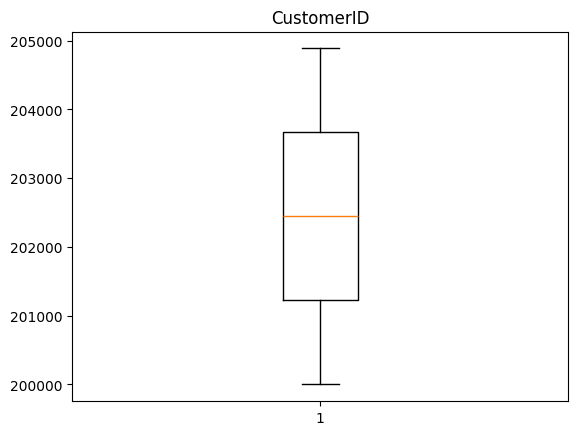

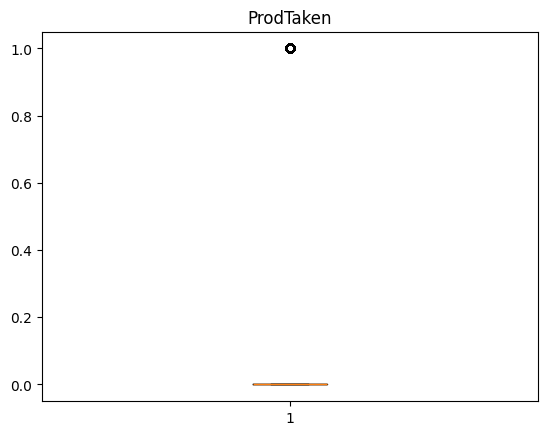

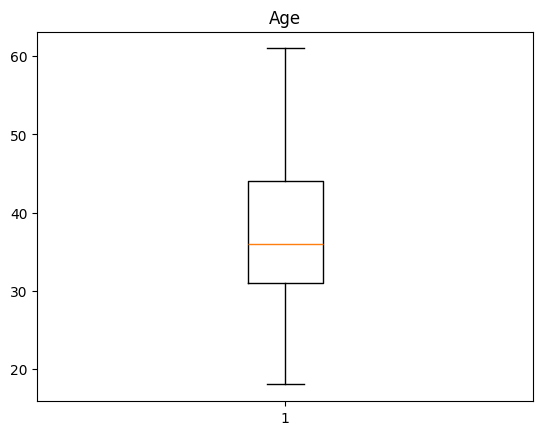

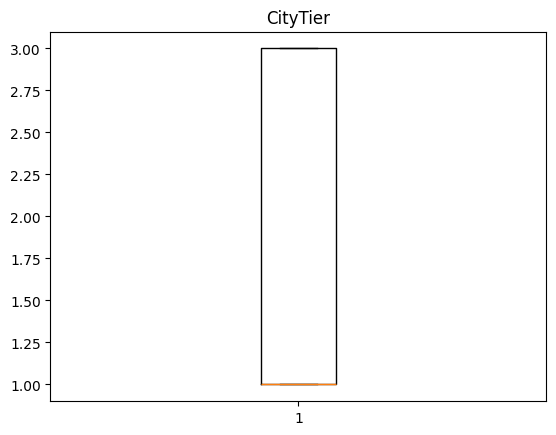

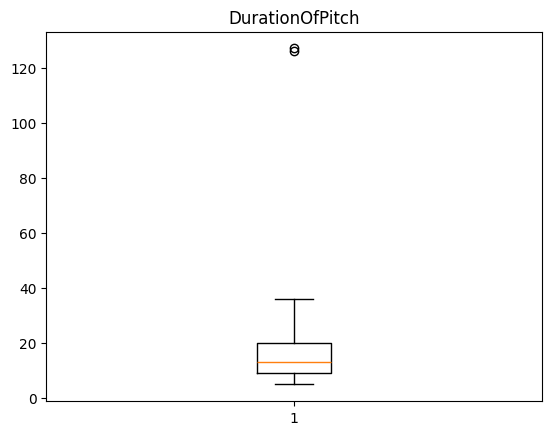

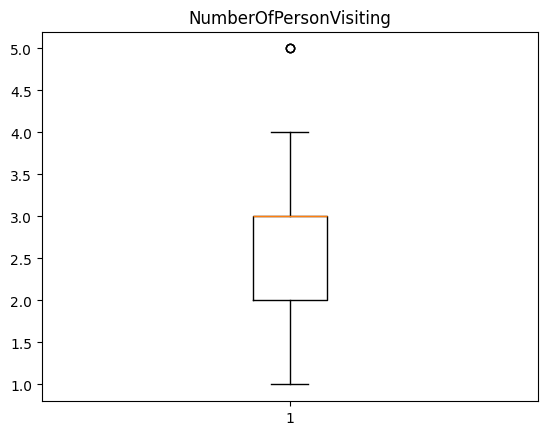

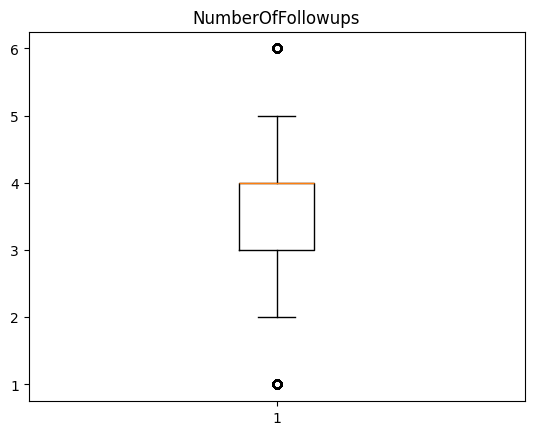

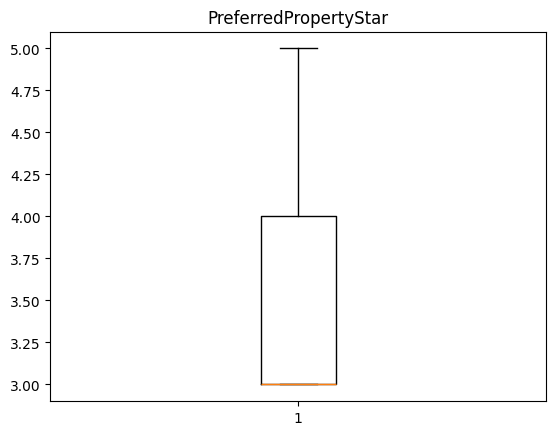

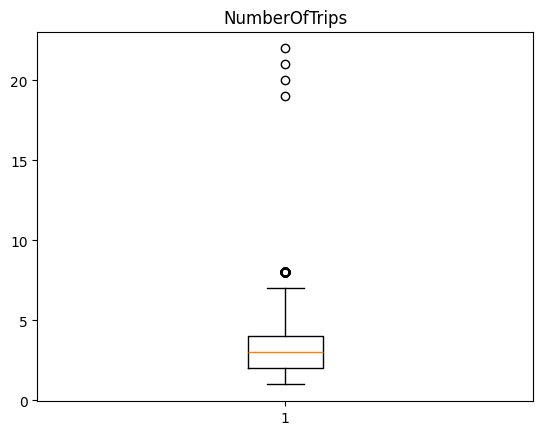

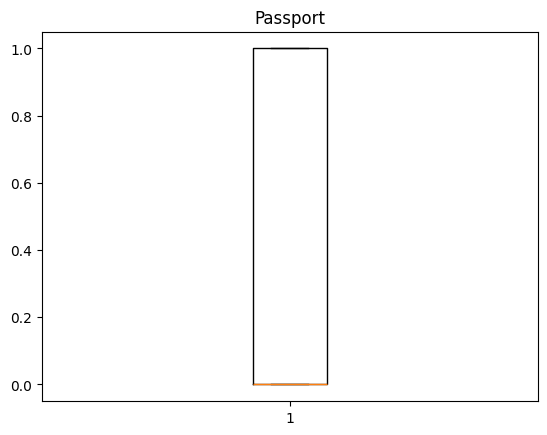

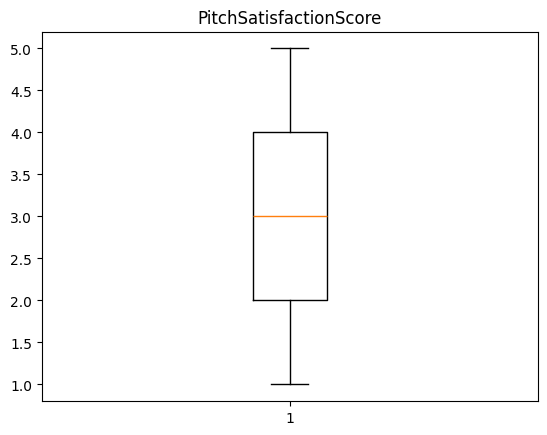

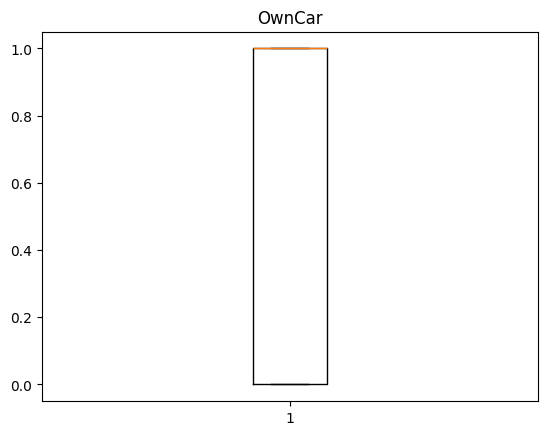

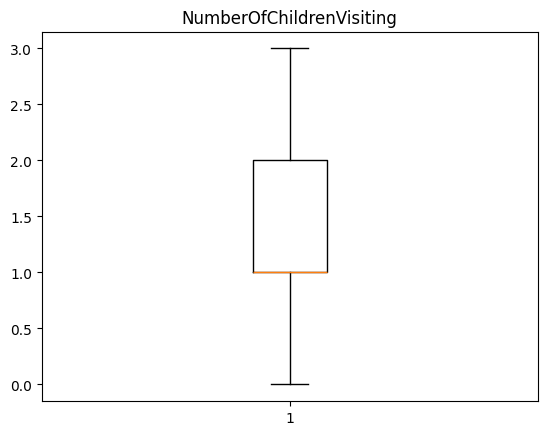

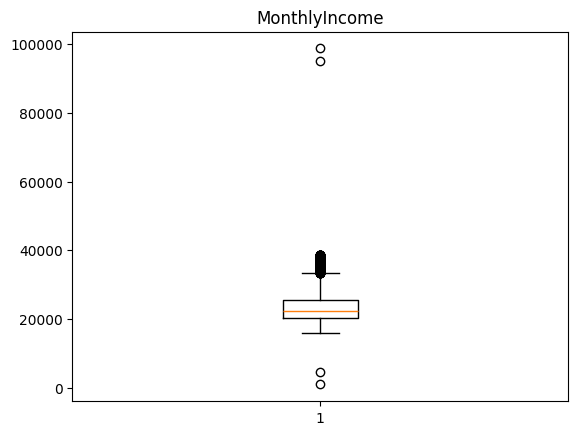

In [359]:
for i in df.columns:

    if df[i].dtype != 'object':  # Check if the column is not of object type
        plt.figure()
        plt.title(i)
        plt.boxplot(df[i].dropna()) # dropna() to handle missing values
        plt.show()

In [360]:
for i in df.columns:
  if df[i].dtype != 'object' and df[i].isnull().sum() > 0:
    df[i].fillna(df[i].median(), inplace=True)
  elif df[i].dtype == 'object' and df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode()[0], inplace=True)


In [361]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [362]:
for i in df.columns :
  if df[i].dtype == 'object':
    print(df[i].value_counts())
    print("-------------------------------------")


TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
-------------------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
-------------------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
-------------------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
-------------------------------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
-------------------------------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
-------------------------------------


In [363]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Unmarried','Single')


In [364]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [365]:
df.duplicated().sum()

np.int64(0)

# Feature Endineering


In [366]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [367]:
df['NumberOfPeopleVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,NumberOfPeopleVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [368]:
num_features=df.select_dtypes(include=['int64','float64'])
cat_features=df.select_dtypes(include=['object'])

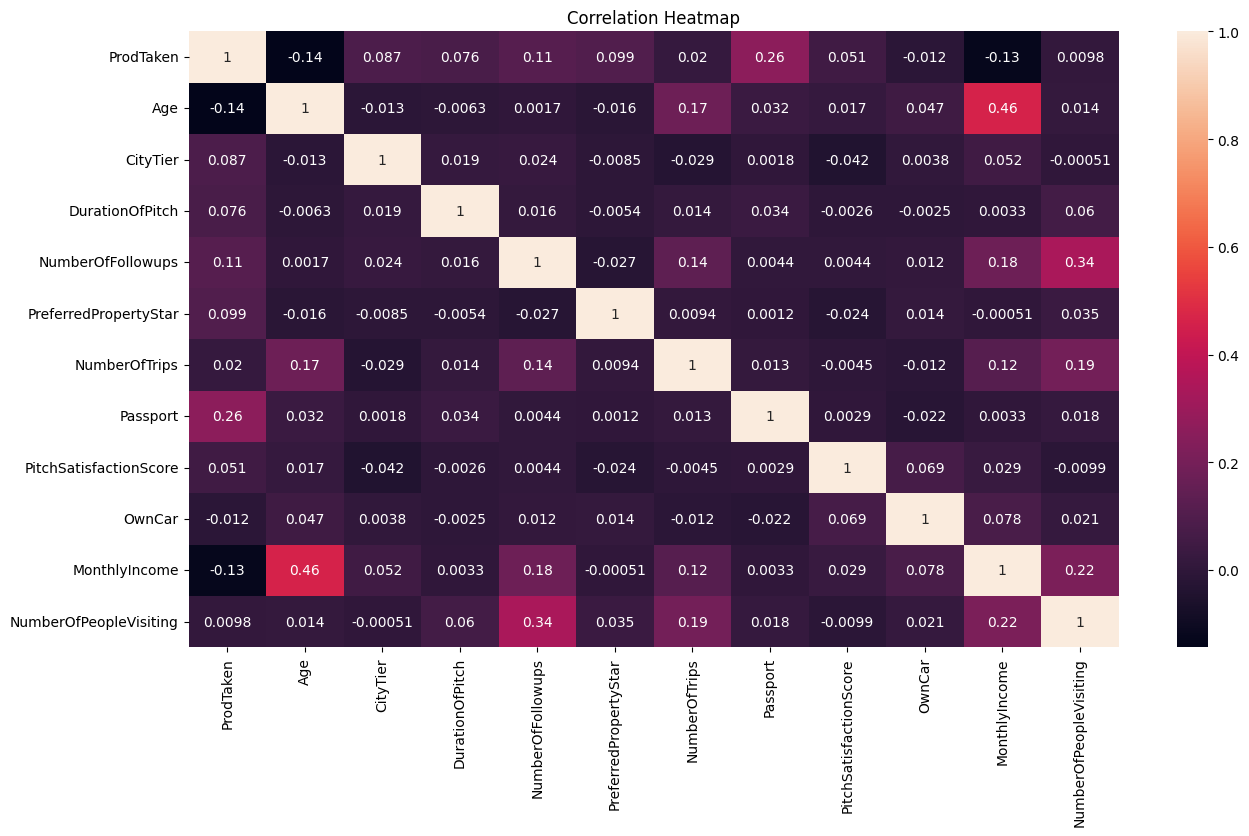

In [369]:
corr = num_features.corr()  # Exclude non-numerical columns
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [370]:
x=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [371]:
from sklearn.feature_selection import mutual_info_classif
num_Xfeatures=x.select_dtypes(include=['int64','float64'])
cat_Xfeatures=x.select_dtypes(include=['object'])
mi = mutual_info_classif(num_Xfeatures, y, discrete_features='auto')
mi_series = pd.Series(mi, index=num_Xfeatures.columns)
mi_series.sort_values(ascending=False, inplace=True)
print(mi_series)


MonthlyIncome             0.066560
Age                       0.037539
Passport                  0.036254
PitchSatisfactionScore    0.007651
DurationOfPitch           0.007165
NumberOfPeopleVisiting    0.004549
NumberOfFollowups         0.004337
CityTier                  0.003326
PreferredPropertyStar     0.001480
NumberOfTrips             0.000000
OwnCar                    0.000000
dtype: float64


In [372]:
x.drop('NumberOfPeopleVisiting',axis=1,inplace=True)
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [373]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [374]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_features=x.select_dtypes(include=['object']).columns
num_features=x.select_dtypes(exclude=['object']).columns
scaler=StandardScaler()
encoder=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer([("Encoder",encoder,cat_features),("Scaler",scaler,num_features)])

In [375]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score,precision_score,recall_score

models={
    "RandomForestClassifier":RandomForestClassifier(),
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}
for i in range (len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_trian)
  y_pred=model.predict(x_test)

  accuracy = accuracy_score(y_test,y_pred)
  conf_matrix = confusion_matrix(y_test,y_pred)
  class_report = classification_report(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  roc_auc = roc_auc_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  print(list(models.keys())[i])
  print("accuracy_score",accuracy)
  print("confusion_matrix",conf_matrix)
  print("classification_report",class_report)
  print("f1_score",f1)
  print("roc_curve", (fpr, tpr, thresholds)) # Printing the tuple of roc_curve results
  print("roc_auc_score",roc_auc)
  print("precision_score",precision)
  print("recall_score",recall)
  print("--------------------------------------")

RandomForestClassifier
accuracy_score 0.9396728016359919
confusion_matrix [[793   5]
 [ 54 126]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.99      0.96       798
           1       0.96      0.70      0.81       180

    accuracy                           0.94       978
   macro avg       0.95      0.85      0.89       978
weighted avg       0.94      0.94      0.94       978

f1_score 0.8102893890675241
roc_curve (array([0.        , 0.00626566, 1.        ]), array([0. , 0.7, 1. ]), array([inf,  1.,  0.]))
roc_auc_score 0.8468671679197994
precision_score 0.9618320610687023
recall_score 0.7
--------------------------------------
LogisticRegression
accuracy_score 0.8415132924335378
confusion_matrix [[778  20]
 [135  45]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.97      0.91       798
           1       0.69      0.25      0.37       180

    accuracy       

# Hyperparameter Tuning for Random Forest

In [377]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
rf_params={
    'n_estimators':[100,200,500,1000],
    'max_depth':[None,5,8,15,10],
    'min_samples_split':[2,8,15,20],
    'min_samples_leaf':[1,2,5,10,15,],
    'max_features':['none','sqrt','log2']
}
rf_params


{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [None, 5, 8, 15, 10],
 'min_samples_split': [2, 8, 15, 20],
 'min_samples_leaf': [1, 2, 5, 10, 15],
 'max_features': ['none', 'sqrt', 'log2']}

In [378]:
random=RandomizedSearchCV(estimator=rf,param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=1)
random.fit(x_train,y_trian)
y_pred=random.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy_score",accuracy)
print("confusion_matrix",conf_matrix)
print("classification_report",class_report)
print("f1_score",f1)
print("roc_curve", (fpr, tpr, thresholds)) # Printing the tuple of roc_curve results
print("roc_auc_score",roc_auc)
print("precision_score",precision)
print("recall_score",recall)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=none, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=none, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=none, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   2.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimato